# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")



# Display the data table for preview
combined_dataset.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice.
mice_count = len(combined_dataset["Mouse ID"].unique())
mice_count


249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_dataset[combined_dataset.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_dataset[combined_dataset["Mouse ID"] == "g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined = combined_dataset.loc[combined_dataset['Mouse ID'] != 'g989']     
cleaned_combined = pd.DataFrame(cleaned_combined)
cleaned_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [29]:
# Checking the number of mice in the clean DataFrame.
cleaned = len(cleaned_combined["Mouse ID"].unique())
cleaned

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned_combined.groupby("Drug Regimen").mean()
median = cleaned_combined.groupby("Drug Regimen").median()
var = cleaned_combined.groupby("Drug Regimen").var()
std = cleaned_combined.groupby("Drug Regimen").std()
sem = cleaned_combined.groupby("Drug Regimen").sem()
summary_stat = pd.DataFrame()
summary_stat["Mean Tumor Volume"] = mean["Tumor Volume (mm3)"]
summary_stat["Median Tumor Volume"] = median["Tumor Volume (mm3)"]
summary_stat["Tumor Volume Variance"] = var["Tumor Volume (mm3)"]
summary_stat["Tumor Volume Std. Dev."] = std["Tumor Volume (mm3)"]
summary_stat["Tumor Volume SEM"] = sem["Tumor Volume (mm3)"]
summary_stat.head(10)

/var/folders/tx/866j9sp56bn2h9wg1z37d2pm0000gn/T/ipykernel_2786/4066387559.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = cleaned_combined.groupby("Drug Regimen").mean()
/var/folders/tx/866j9sp56bn2h9wg1z37d2pm0000gn/T/ipykernel_2786/4066387559.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = cleaned_combined.groupby("Drug Regimen").median()
/var/folders/tx/866j9sp56bn2h9wg1z37d2pm0000gn/T/ipykernel_2786/4066387559.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify num

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregated = cleaned_combined.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
aggregated.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [32]:
grouped = cleaned_combined.groupby(["Drug Regimen"]).count()["Mouse ID"]
grouped

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

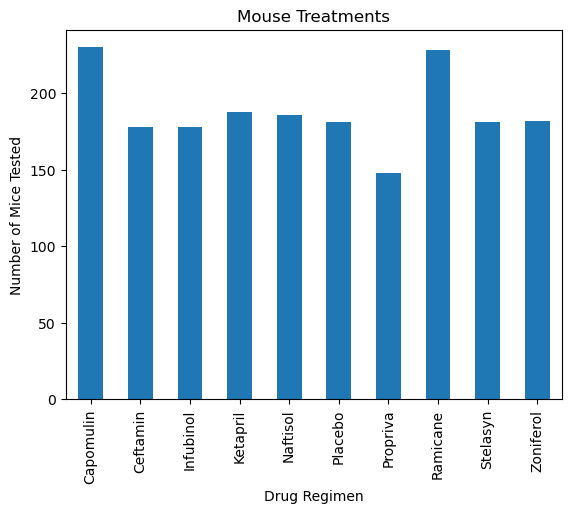

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped.plot(kind="bar", title = "Mouse Treatments", legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


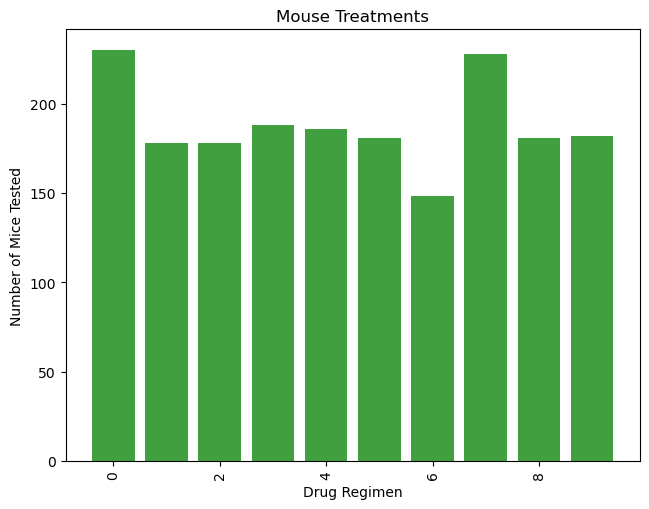

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
timepoints = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

drug = np.arange(len(grouped))
tick_locations = []
for x in drug:
    tick_locations.append(x)

plt.bar(drug, timepoints, facecolor="green", alpha=0.75, align="center")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Mouse Treatments")
plt.show()


Male      958
Female    922
Name: Sex, dtype: int64

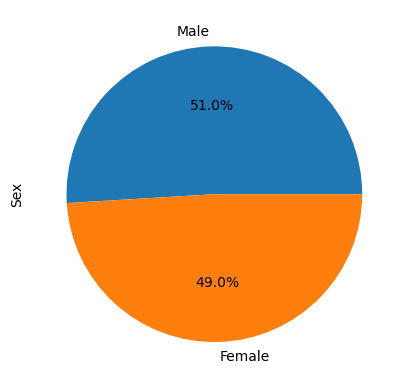

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

genders = cleaned_combined["Sex"].value_counts()
genders.plot.pie(y="Sex", autopct='%1.1f%%', legend=False)
genders

Text(0.5, 1.0, 'Sex')

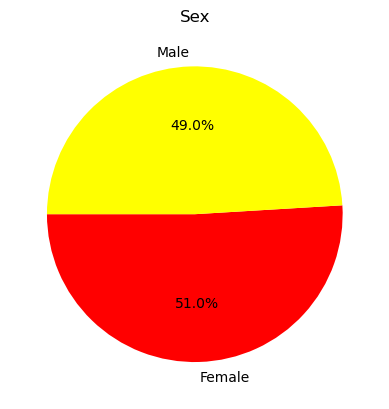

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = genders
colors = ["red", "yellow"]
plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Sex")


## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = cleaned_combined.loc[cleaned_combined["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_combined.loc[cleaned_combined["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_combined.loc[cleaned_combined["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_combined.loc[cleaned_combined["Drug Regimen"] == "Ceftamin", :]

In [38]:
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, cleaned_combined, on=("Mouse ID","Timepoint"),how="left")
Capomulin_last.head()

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
Name: Timepoint, dtype: int64

In [39]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [40]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, cleaned_combined, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [41]:
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, cleaned_combined, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [42]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

Inf_quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = Inf_quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 40.65900627
The interquartile range of Infubinol tumors is: -13.389601419999998
The median of Infubinol tumors is: 36.56165229 
Values below 74.13300982 could be outliers.
Values above 20.57460414 could be outliers.


In [43]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleaned_combined, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [44]:
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [45]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = cleaned_combined["Tumor Volume (mm3)"]

Capomulin = cleaned_combined.loc[cleaned_combined["Drug Regimen"] == "Capomulin",:]
Ramicane = cleaned_combined.loc[cleaned_combined["Drug Regimen"] == "Ramicane",:]
Infubinol = cleaned_combined.loc[cleaned_combined["Drug Regimen"] == "Infubinol",:]
Ceftamin = cleaned_combined.loc[cleaned_combined["Drug Regimen"] == "Ceftamin",:]
Drug_Regimens = [Capomulin, Ramicane, Infubinol, Ceftamin]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = [drug["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75]) for drug in Drug_Regimens]
lowerq =[(quartiles[0.25] for tumor in quartiles)]
upperq = [(quartiles[0.75] for tumor in quartiles)]
iqr =[(upperq-lowerq for tumor in quartiles)]

lower_bound =[( lowerq - (1.5*iqr)for drug in Drug_Regimens)]
upper_bound = [(upperq + (1.5*iqr)for drug in Drug_Regimens)]   
    # Locate the rows which contain mice on each drug and get the tumor volumes
outliers = [] 
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
quartiles   

[0.25    37.685933
 0.50    41.557809
 0.75    45.000000
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    36.674635
 0.50    40.673236
 0.75    45.000000
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    47.312353
 0.50    51.820584
 0.75    57.314444
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    47.208427
 0.50    51.776157
 0.75    56.801438
 Name: Tumor Volume (mm3), dtype: float64]

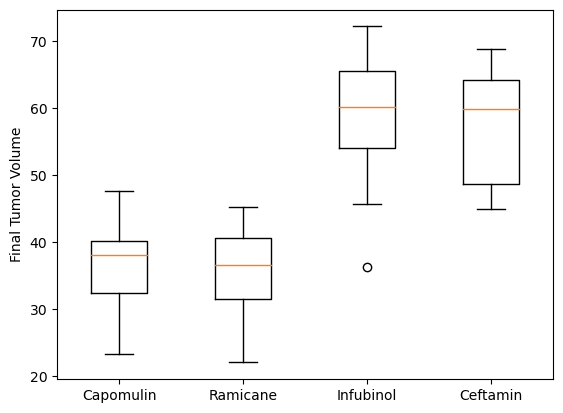

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Drugs = [Capomulin_merge["Tumor Volume (mm3)"], Ramicane_merge["Tumor Volume (mm3)"], Infubinol_merge["Tumor Volume (mm3)"],\
         Ceftamin_merge["Tumor Volume (mm3)"]]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Drugs)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1771,l509,45,41.483008,3,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21


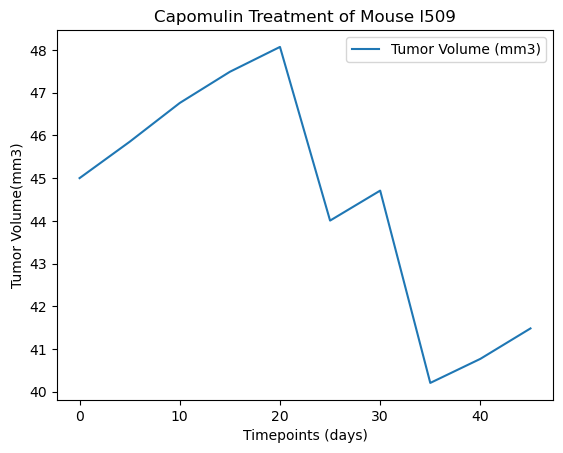

In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
sorted_cap = cleaned_combined.sort_values(by = ["Timepoint"], ascending= False)
cap = sorted_cap.loc[(sorted_cap["Drug Regimen"]=="Capomulin") &( sorted_cap["Mouse ID"]=="l509" ), :]
cap.plot( 'Timepoint' , 'Tumor Volume (mm3)' )
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume(mm3)")
cap.head()


/var/folders/tx/866j9sp56bn2h9wg1z37d2pm0000gn/T/ipykernel_2786/2547346532.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight = weight.groupby(["Weight (g)","Mouse ID"], as_index= False).mean()


Text(0, 0.5, 'Average Tumor Volume(mm3)')

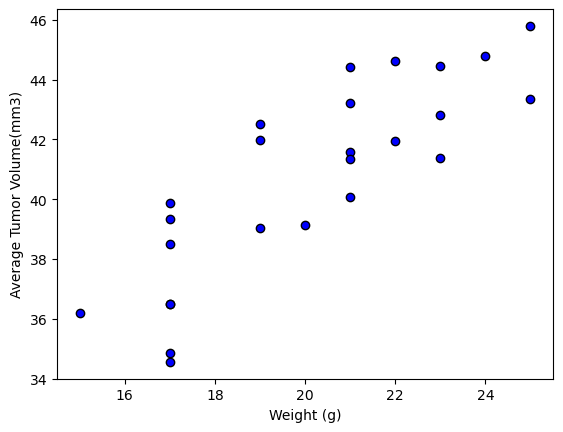

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = cleaned_combined.loc[(cleaned_combined["Drug Regimen"]=="Capomulin") , :]
weight = weight.groupby(["Weight (g)","Mouse ID"], as_index= False).mean()
plt.scatter(weight["Weight (g)"], weight["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")


## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708721


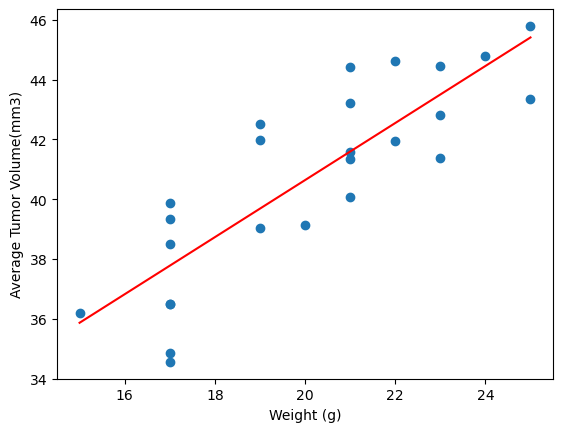

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight["Weight (g)"],weight["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight["Weight (g)"],weight["Tumor Volume (mm3)"])
regress_values = weight["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight["Weight (g)"],weight["Tumor Volume (mm3)"])
plt.plot(weight["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume(mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
